In [1]:
import sys 
sys.path.append('../scripts/')
from robot import *
from scipy.stats import multivariate_normal

In [2]:
class Particle: ###Particle5
    def __init__(self, init_pose):
        self.pose = init_pose
        
    def motion_update(self, nu, omega, time, noise_rate_pdf): #追加
        ns = noise_rate_pdf.rvs() #順にnn, no, on, oo
        noised_nu = nu + ns[0]*math.sqrt(abs(nu)/time) + ns[1]*math.sqrt(abs(omega)/time)
        noised_omega = omega + ns[2]*math.sqrt(abs(nu)/time) + ns[3]*math.sqrt(abs(omega)/time)
        self.pose = IdealRobot.state_transition(noised_nu, noised_omega, time, self.pose)

In [3]:
class Mcl: 
    def __init__(self, init_pose, num, motion_noise_stds): 
        self.particles = [Particle(init_pose) for i in range(num)]
        
        v = motion_noise_stds
        c = np.diag([v["nn"]**2, v["no"]**2, v["on"]**2, v["oo"]**2])
        self.motion_noise_rate_pdf = multivariate_normal(cov=c)
        
    def motion_update(self, nu, omega, time): ###Mcl5###
        for p in self.particles: p.motion_update(nu, omega, time, self.motion_noise_rate_pdf)
        
    def draw(self, ax, elems): 
        xs = [p.pose[0] for p in self.particles]
        ys = [p.pose[1] for p in self.particles]
        vxs = [math.cos(p.pose[2]) for p in self.particles] 
        vys = [math.sin(p.pose[2]) for p in self.particles] 
        elems.append(ax.quiver(xs, ys, vxs, vys, color="blue", alpha=0.5))

In [4]:
class EstimationAgent(Agent):        ###EstimationAgent5
    def __init__(self, time_interval, nu, omega, estimator):
        super().__init__(nu, omega)
        self.estimator = estimator
        self.time_interval = time_interval
        
        self.prev_nu = 0.0       #追加
        self.prev_omega = 0.0 #追加
        
    def decision(self, observation=None): #追加
        self.estimator.motion_update(self.prev_nu, self.prev_omega, self.time_interval)
        self.prev_nu, self.prev_omega = self.nu, self.omega
        return self.nu, self.omega
        
    def draw(self, ax, elems):
        self.estimator.draw(ax, elems)

In [5]:
initial_pose = np.array([0, 0, 0]).T   ###mcl5_test（下の出力の先頭数行を記載）
estimator = Mcl(initial_pose, 100, motion_noise_stds={"nn":0.01, "no":0.02, "on":0.03, "oo":0.04})
a = EstimationAgent(0.1, 0.2, 10.0/180*math.pi, estimator)
estimator.motion_update(0.2, 10.0/180*math.pi, 0.1)
for p in estimator.particles:
    print(p.pose)

[0.01727327 0.00025067 0.02902217]
[1.73231614e-02 5.36604930e-05 6.19521114e-03]
[0.02186472 0.00018787 0.01718393]
[0.02262004 0.00013397 0.01184526]
[0.01960809 0.00018527 0.01889687]
[0.0238592  0.00019542 0.01638097]
[0.02419432 0.00031422 0.02597294]
[0.01959108 0.0001525  0.01556799]
[0.02065595 0.00038013 0.03680127]
[0.01943851 0.00020846 0.02144759]
[0.01874274 0.00021085 0.02249861]
[0.02202495 0.00011194 0.01016476]
[0.02056016 0.00018594 0.01808644]
[2.30641148e-02 8.89989572e-05 7.71748807e-03]
[0.01649304 0.00014125 0.01712785]
[1.93655168e-02 8.87957696e-05 9.17043919e-03]
[0.01657698 0.00010852 0.01309233]
[0.01876717 0.00021768 0.02319699]
[0.02274892 0.00013208 0.01161155]
[1.86334217e-02 9.62065160e-05 1.03261400e-02]
[0.01639415 0.00019484 0.02376876]
[2.23760355e-02 9.22501081e-05 8.24539141e-03]
[0.02183578 0.00034382 0.03148852]
[0.02470965 0.00031223 0.02527045]
[1.62178323e-02 9.34159462e-05 1.15200246e-02]
[0.02056665 0.0002121  0.02062455]
[2.16878046e-02 9.

<IPython.core.display.Javascript object>


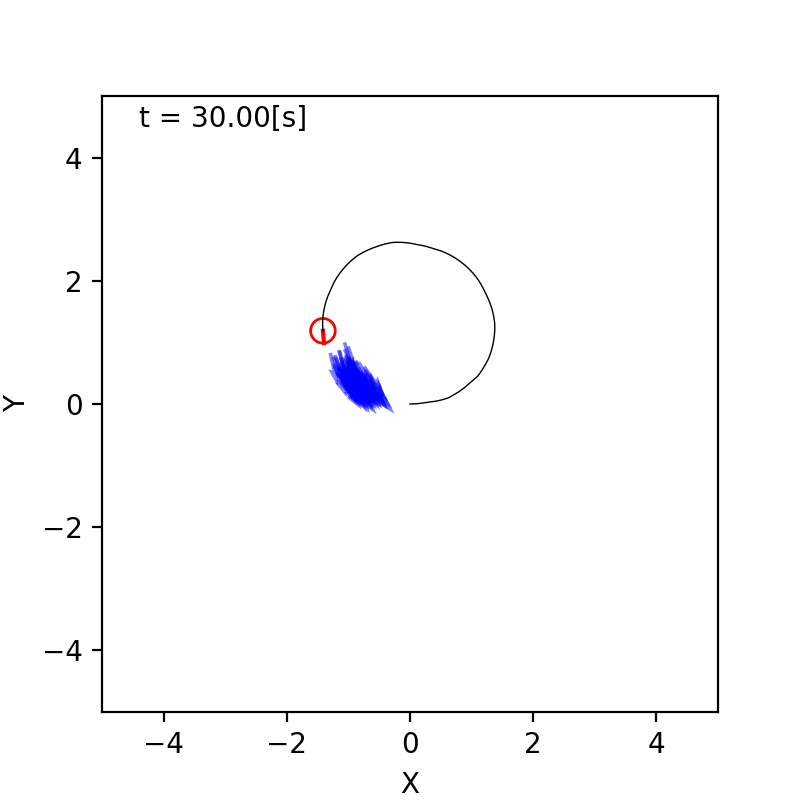

In [11]:
def trial(motion_noise_stds): ###draw_mcl5###（下の絵も）
    time_interval = 0.1 
    world = World(30, time_interval) 

    initial_pose = np.array([0, 0, 0]).T
    estimator = Mcl(initial_pose, 100, motion_noise_stds)
    circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, estimator)
    r = Robot(initial_pose, sensor=None, agent=circling, color="red" )
    world.append(r)

    world.draw()
    
trial({"nn":0.01, "no":0.02, "on":0.03, "oo":0.04})

In [7]:
#trial({"nn":0.001, "no":0.002, "on":0.003, "oo":0.004})

In [8]:
#trial({"nn":1, "no":2, "on":3, "oo":4})

<IPython.core.display.Javascript object>


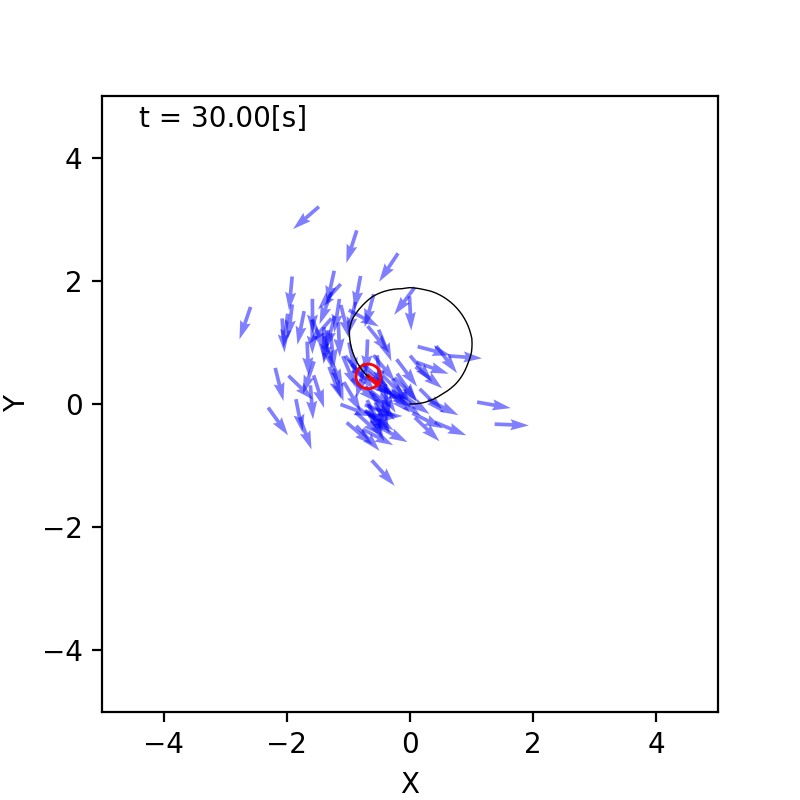

In [13]:
trial({"nn":0.19, "no":0.001, "on":0.13, "oo":0.2})

In [9]:
def trial(motion_noise_stds): ###draw_mcl5###（下の絵も）
    time_interval = 0.1 
    world = World(40, time_interval) 

    initial_pose = np.array([0, 0, 0]).T
    estimator = Mcl(initial_pose, 100, motion_noise_stds)
    circling = EstimationAgent(time_interval, 0.1, 0.0, estimator)
    r = Robot(initial_pose, sensor=None, agent=circling, color="red" )
    world.append(r)

    world.draw()

#trial({"nn":0.001, "no":0.001, "on":0.13, "oo":0.001})